# Drageproblemer

Av: Sverre Johann Bjørke

Taenerys Dargaryen og dragen hennes har landet på en liten øy. Øya har få ressurser, med unntak av sauene som den lokale befolkningen lever av. For å ikke selv bli spist, setter de lokale i gang en aggressiv saueoppdrett slik at de hver dag kan gi en mengde sauer til dragen. I det de ankommer er dragen 50 enheter stor, og trenger derfor 50 sauer for å vokse seg større. Om den får dette blir den en enhet større neste dag, og trenger da en sau mer. Om det en dag er sauer til overs, blir disse overført til neste dags offer. Om det er for lite sauer en dag spiser dragen alle men krymper likevel en størrelse. Den påfølgende dagen trenger den da en mindre sau. Om dragen får for lite mat fem dager på rad, går dragen berserk og spiser alle på øya.

### Oppgave

I denne filen er antall sauer som er tilgjengelige for hver dag, seprarert med komma. Hvor mange dager overlever befolkningen?
Eksempel

Gitt en saueforsyning som dette 50, 52, 52, 49, 50, 47, 45, 43, 50, 55 skjer følgende:

Dag 1 - Dragen spiser nok og vokser en størrelse.
Dag 2 - Dragen spiser nok og vokser en størrelse. En sau til overs overført til neste dag.
Dag 3 - Dragen spiser nok og vokser en størrelse. En sau til overs overført til neste dag.
Dag 4 - Dragen spiser for lite mat og krymper en størrelse.
Dag 5 - Dragen spiser for lite mat og krymper en størrelse.
Dag 6 - Dragen spiser for lite mat og krymper en størrelse.
Dag 7 - Dragen spiser for lite mat og krymper en størrelse.
Dag 8 - Dragen spiser for lite mat for femte dag på rad og spiser alle.

Befolkningen på øya overlevde altså i 7 dager.

# Solution

In [24]:
# imports
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [25]:
# Rules
days_without_enough_food_threshold = 5
dragon_initial_size = 50

In [26]:
# Read the contents of sau.txt
new_sheeps = genfromtxt('./sau.txt', delimiter=',')
days_to_compute = new_sheeps.shape[0]

In [27]:
# Arrays for statistics
total_sheep_series = np.empty(days_to_compute)
dragon_size_series = np.empty(days_to_compute)
spare_sheeps_series = np.empty(days_to_compute)


In [28]:
# Temp variables
today_sheep = 0
spare_sheep = 0
dragon_size = dragon_initial_size
days_without_enough_food = 0

# Start looping over the days
for day in range(days_to_compute):
    
    # Get the sheep count for current day
    today_sheep = new_sheeps[day] + spare_sheep
    total_sheep_series[day] = today_sheep
    
    # Get the number of sheeps for the next day
    spare_sheeps = max(today_sheep-dragon_size, 0)
    spare_sheeps_series[day] = spare_sheeps
    
    # Feed the dragon
    if today_sheep >= dragon_size:
        dragon_size += 1
        days_without_enough_food = 0
    else:
        dragon_size -= 1
        days_without_enough_food += 1
    
    dragon_size_series[day] = dragon_size
        
    if days_without_enough_food == days_without_enough_food_threshold:
        print("Killed on day:", day)

# Statistics

## Dragon size


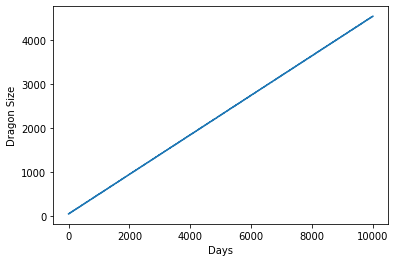

In [30]:
plt.plot(dragon_size_series)
plt.ylabel("Dragon Size")
plt.xlabel("Days")
plt.show()


## Sheep per day

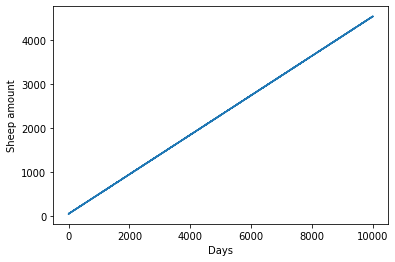

In [31]:
plt.plot(total_sheep_series)
plt.ylabel("Sheep amount")
plt.xlabel("Days")
plt.show()



## Spare sheeps

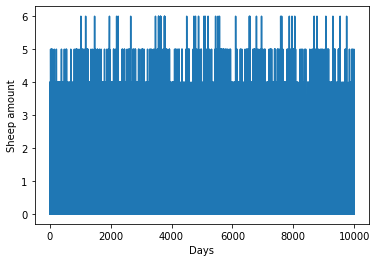

In [32]:
plt.plot(spare_sheeps_series)
plt.ylabel("Sheep amount")
plt.xlabel("Days")
plt.show()

## Spare sheeps

